
# Рубежный контроль №1

## Технологии разведочного анализа и обработки данных.

### Вариант №2

##### Выполнил: Борисочкин М. И., РТ5-61Б

### Текстовое описание набора данных

В качестве набора данных в данном варианте используется игрушечный датасет "Ирисы Фишера"([load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)) из библиотеки scikit-learn.

В данном датасете присутствуют следующие столбцы:

- sepal length — длина чашелистика в см;
- sepal width — ширина чашелистика в см;
- petal length — длина лепестка в см;
- petal width — ширина лепестка в см;
- target — целевой признак. Представляет собой виды ирисов: Iris setosa (0), Iris versicolor (1), Iris virginica (2).


### Импорт библиотек


In [1]:
from sklearn.datasets import load_iris

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='ticks')


### Загрузка данных

In [2]:
# Загрузка датасета
iris = load_iris(as_frame=True)
data : pd.DataFrame = iris.frame


### Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Последние 5 строк датасета
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [5]:
# Размер датасета
data.shape

(150, 5)

In [6]:
# Типы данных в столбцах
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [7]:
# Пустые значения
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
# Статистические характеристки датасета
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Метки целевого признака и их количество
data['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64


### Корреляционный анализ

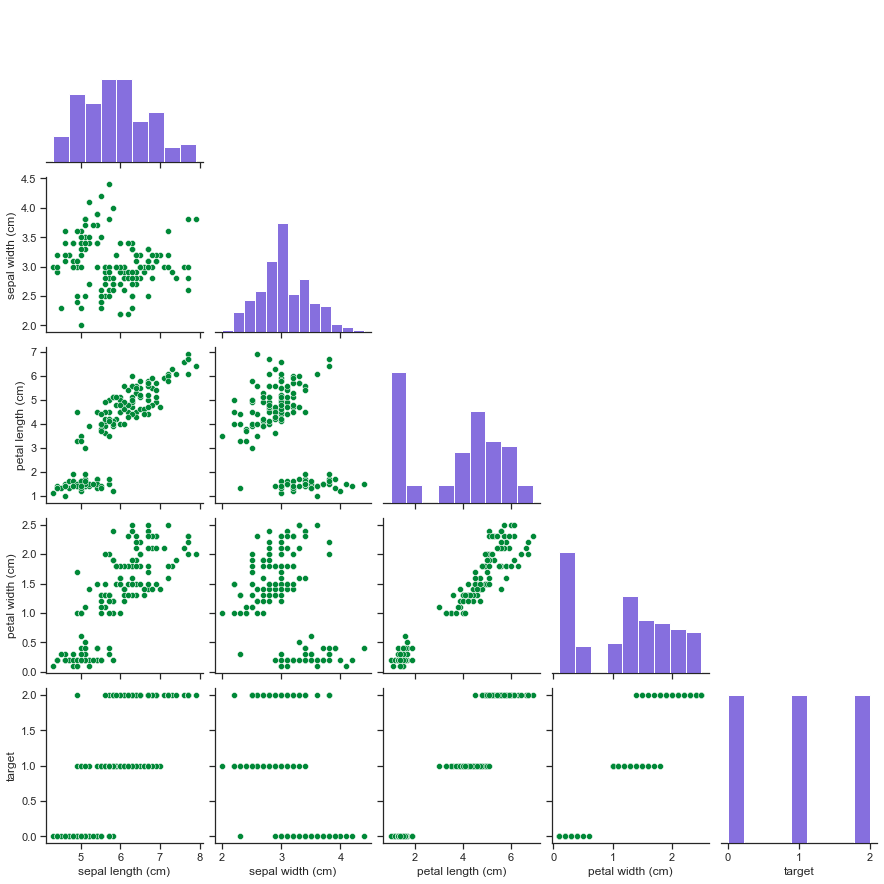

In [10]:
# Парные диаграммы
sns.pairplot(data, corner=True, plot_kws=dict(color='#008837'),
             diag_kws=dict(color='#5D3FD3'))
plt.show()

Из парных диаграмм выше видно, что сильно коррелируют следующие пары параметров:
- petal length (cm) и petal width (cm);
- petal length (cm) и target;
- petal width (cm) и target.

Теперь для потверждения корреляции данных параметров и нахождения новых (коррелирующих параметров) построим тепловую карту корреляционной матрицы:

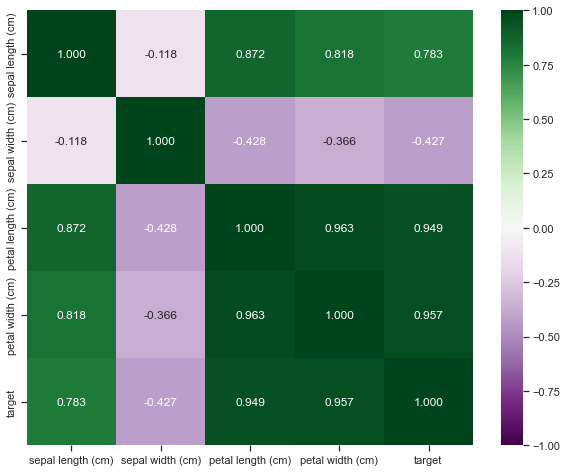

In [11]:
# Тепловая карта корреляционной матрицы
plt.figure(figsize=(10,8))
sns.heatmap(data=data.corr(), annot=True, vmin=-1, vmax=1,  fmt='.3f', cmap='PRGn')
plt.show()

Из данной корреляционной матрицы мы можем сделать следующие выводы:
- Признаки sepal length (cm), petal length (cm) и petal width (cm) сильно коррелируют с целевым признаком target;
- Нецелевые признаки, указанные выше, также довольно сильно коррелируют между собой, поэтому есть смысл оставить только один из них: petal width (cm), так как у него самый высокий коэффициент корреляции с целевым признаком (0,96);
- Признак sepal width (cm) мало коррелирует с остальными нецелевыми признаками, при этом имея некоторый уровень корреляции с целевым параметром target, поэтому оставляем его.

Итого, для обучения модели будем использовать только два признака: petal width (cm) и sepal width (cm).

Для выполнения дополнительного задания построим jointplot оставшихся признаков.

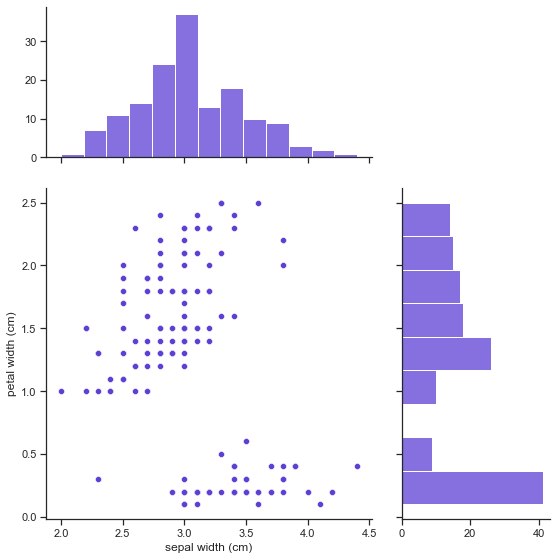

In [12]:
# Jointplot (доп. задание)
sns.jointplot(x='sepal width (cm)', y='petal width (cm)', data=data,
              color='#5D3FD3', height=8, ratio=2, marginal_ticks=True)
plt.show()